In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Data Generators
train_generator = ImageDataGenerator(
    rescale = 1.0 / 255
)

test_generator = ImageDataGenerator(
    rescale = 1.0 / 255
)

In [3]:
# Information for iterator
TRAIN_DIRECTORY = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
TEST_DIRECTORY = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'
CLASS_MODE = 'categorical'
COLOR_MODE = 'rgb'
TARGET_SIZE = (128, 128)
BATCH_SIZE = 32

train_iterator = train_generator.flow_from_directory(
    directory = TRAIN_DIRECTORY,
    class_mode = CLASS_MODE,
    color_mode = COLOR_MODE,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE
)

test_iterator = test_generator.flow_from_directory(
    directory = TEST_DIRECTORY,
    class_mode = CLASS_MODE,
    color_mode = COLOR_MODE,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [4]:
# Create Model

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape = (128, 128, 3)))

model.add(tf.keras.layers.Conv2D(128, 3, strides = 2, padding = 'same', activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(tf.keras.layers.Conv2D(64, 2, strides = 2, padding = 'same', activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(300, activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(100, activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 300)               1

In [5]:
# Compile model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)

In [6]:
# Fit method

history = model.fit(
    train_iterator,
    steps_per_epoch = train_iterator.samples / BATCH_SIZE,
    epochs = 4,
    validation_data = test_iterator,
    validation_steps = test_iterator.samples / BATCH_SIZE
)

Epoch 1/4
340/340 [==============================] - 175s 512ms/step - loss: 0.9312 - categorical_accuracy: 0.6483 - auc: 0.9127 - val_loss: 0.3476 - val_categorical_accuracy: 0.8829 - val_auc: 0.9871
Epoch 2/4
340/340 [==============================] - 88s 258ms/step - loss: 0.4493 - categorical_accuracy: 0.8470 - auc: 0.9777 - val_loss: 0.3128 - val_categorical_accuracy: 0.8903 - val_auc: 0.9891
Epoch 3/4
340/340 [==============================] - 88s 257ms/step - loss: 0.3564 - categorical_accuracy: 0.8800 - auc: 0.9854 - val_loss: 0.2895 - val_categorical_accuracy: 0.8984 - val_auc: 0.9906
Epoch 4/4
340/340 [==============================] - 87s 256ms/step - loss: 0.3012 - categorical_accuracy: 0.8973 - auc: 0.9892 - val_loss: 0.2302 - val_categorical_accuracy: 0.9173 - val_auc: 0.9939


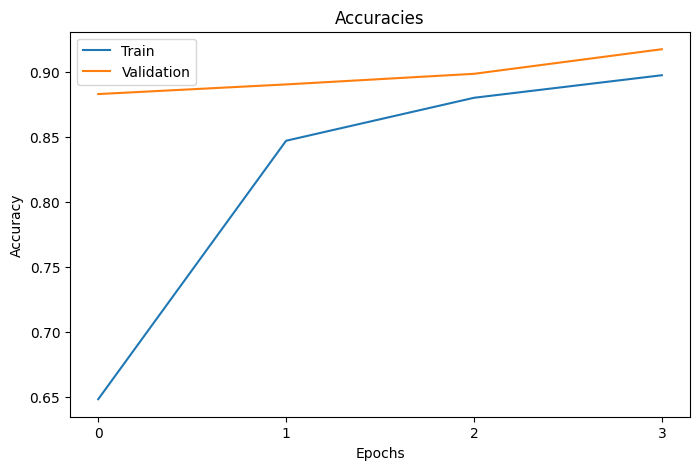

In [7]:
# Plot of accuracy
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(history.history['categorical_accuracy'])
ax.plot(history.history['val_categorical_accuracy'])

ax.legend(['Train', 'Validation'])
ax.set_title('Accuracies')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2, 3]);

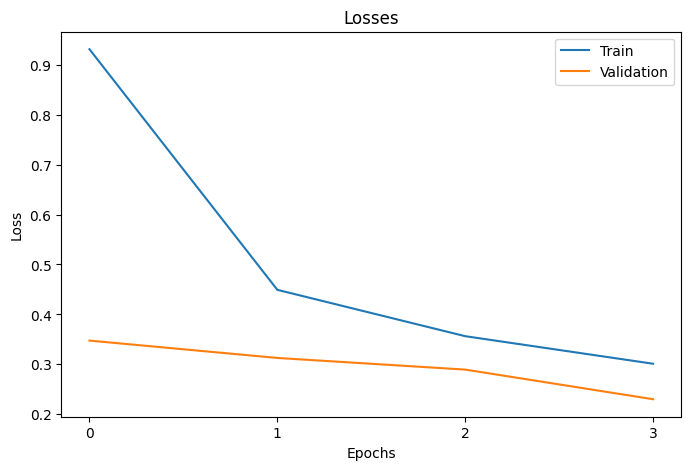

In [8]:
# Plot of losses
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

ax.legend(['Train', 'Validation'])
ax.set_title('Losses')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_xticks([0, 1, 2, 3]);

In [9]:
acc = model.evaluate(test_iterator)
print(f'Test accuracy: {acc[1]}')

85/85 [==============================] - 13s 155ms/step - loss: 0.2302 - categorical_accuracy: 0.9173 - auc: 0.9939
Test accuracy: 0.917346179485321


In [10]:
# Defines class names
class_names = np.array(['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange'])

In [11]:
X, y = test_iterator.next()
y_pred = np.argmax(model.predict(X), axis = 1)
prediction_classes = np.take(class_names, y_pred)

1/1 [==============================] - 0s 117ms/step


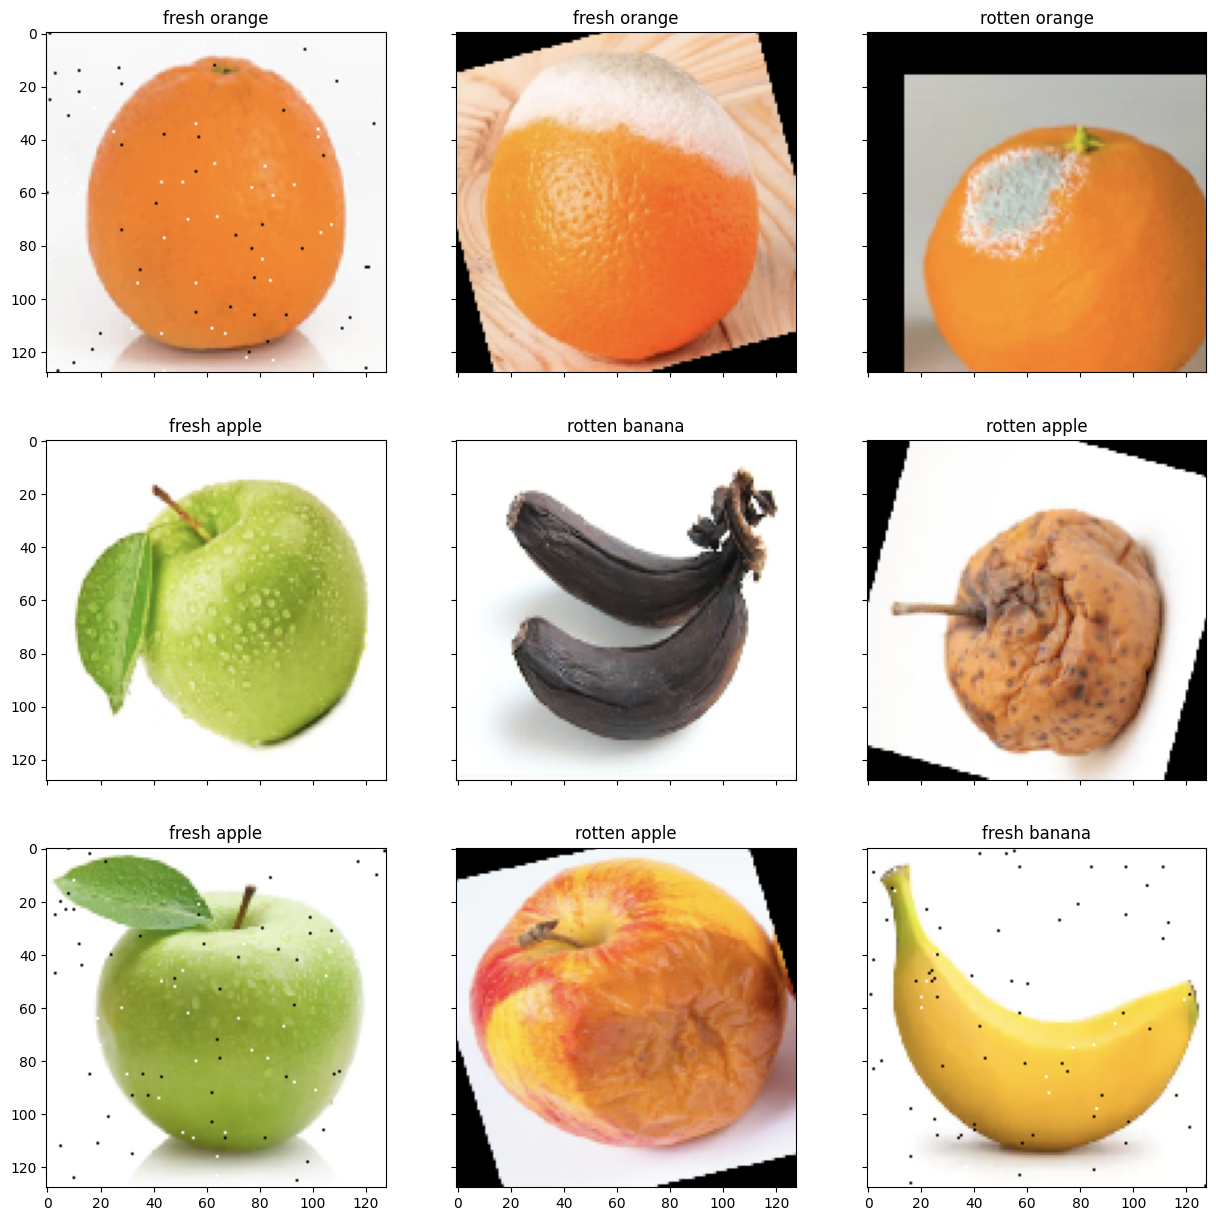

In [12]:
# Images
rows = 3
cols = 3
fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (rows * 5, cols * 5), sharex = True, sharey = True)

counter = 0
for i in range(rows):
    for j in range(cols):
        axs[i, j].imshow(X[counter])
        axs[i, j].set_title(prediction_classes[counter])
        counter += 1